# Stock Price Predictive Model Using LSTM

In this project, we aim to develop a predictive model for forecasting the stock price of ITC Limited. The dataset used includes the daily stock prices of ITC from January 1, 2021, to September 6, 2024. Our approach leverages historical stock price data, operating on the assumption that the current stock price is influenced by the prices from previous days. Specifically, we set a time window of 100 days, meaning that the price on any given day is predicted based on the previous 100 days' prices.

The dataset was split into two parts: 70% was used for training the model, while the remaining 30% was reserved for testing and validation. The core of the model revolves around time-series forecasting, with the goal of accurately predicting future stock prices based on past trends.

To evaluate the performance of the model, we calculated the mean squared error (MSE), which provides an indication of how well the predictions align with the actual stock prices. Additionally, graphical representations were generated, comparing the actual stock prices to the model's predicted prices for both the training and testing datasets.

This project demonstrates how predictive models can be applied to real-world financial data, offering valuable insights for investment and decision-making in the stock market.In this project, we aim to develop a predictive model for forecasting the stock price of ITC Limited. The dataset used includes the daily stock prices of ITC from January 1, 2021, to September 6, 2024. Our approach leverages historical stock price data, operating on the assumption that the current stock price is influenced by the prices from previous days. Specifically, we set a time window of 100 days, meaning that the price on any given day is predicted based on the previous 100 days' prices.

The dataset was split into two parts: 70% was used for training the model, while the remaining 30% was reserved for testing and validation. The core of the model revolves around time-series forecasting, with the goal of accurately predicting future stock prices based on past trends.

To evaluate the performance of the model, we calculated the mean squared error (MSE), which provides an indication of how well the predictions align with the actual stock prices. Additionally, graphical representations were generated, comparing the actual stock prices to the model's predicted prices for both the training and testing datasets.

This project demonstrates how predictive models can be applied to real-world financial data, offering valuable insights for investment and decision-making in the stock market.

In [24]:
import numpy as np                                   # for data manipulation
import pandas as pd 

import matplotlib.pyplot as plt                      # for data visualisation
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')



# Create LSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import tensorflow as tf

In [3]:
data = pd.read_csv('ITC Historical Data.csv')
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,06-09-2024,501.70,512.00,512.00,497.15,13.72M,-1.86%
1,05-09-2024,511.20,508.35,511.90,507.05,10.90M,0.96%
2,04-09-2024,506.35,500.00,510.05,499.95,8.41M,-0.60%
3,03-09-2024,509.40,510.05,515.95,507.90,12.02M,-0.13%
4,02-09-2024,510.05,504.00,512.90,503.30,15.89M,1.62%


In [4]:
df =  data[['Price']]

In [5]:
df

,Price
0,501.70
1,511.20
2,506.35
3,509.40
4,510.05
...,...
908,202.80
909,205.40
910,211.45
911,213.40


In [6]:
df = df.iloc[::-1].reset_index(drop=True)         # Reverse the DataFrame rows (reverse indexing)

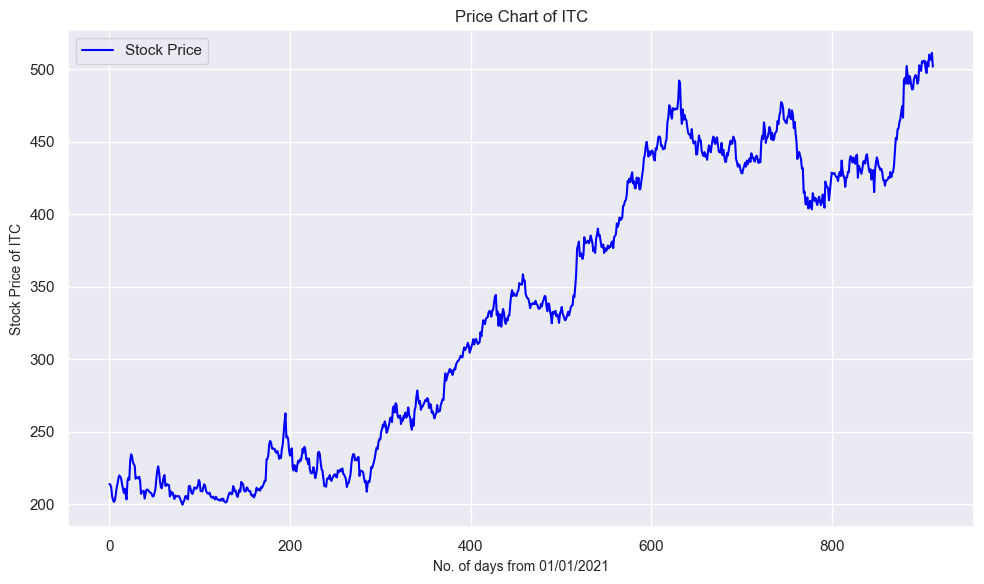

In [7]:

plt.figure(figsize=(10, 6))


plt.plot(df.index, df['Price'], label='Stock Price', color='blue')

plt.title('Price Chart of ITC', fontsize=12)
plt.xlabel('No. of days from 01/01/2021', fontsize=10)
plt.ylabel('Stock Price of ITC', fontsize=10)

plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [55]:
scaler = StandardScaler()
df = scaler.fit_transform(df)          # normalizing the data
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [56]:
df

array([[-1.19783662],
       [-1.20233229],
       [-1.22181353],
       [-1.28225534],
       [-1.30823034],
       [-1.32121783],
       [-1.31122745],
       [-1.27176544],
       [-1.22381161],
       [-1.1948395 ],
       [-1.15787509],
       [-1.13889336],
       [-1.14788471],
       [-1.15987317],
       [-1.19933517],
       [-1.22930632],
       [-1.25827843],
       [-1.22980584],
       [-1.27026689],
       [-1.30373467],
       [-1.17685681],
       [-1.15437846],
       [-1.16886451],
       [-1.03699147],
       [-0.99303379],
       [-1.00552176],
       [-1.04648233],
       [-1.06096838],
       [-1.0719578 ],
       [-1.16187124],
       [-1.1503823 ],
       [-1.15387894],
       [-1.15887413],
       [-1.14788471],
       [-1.17685681],
       [-1.26577121],
       [-1.25128516],
       [-1.24778853],
       [-1.24479141],
       [-1.29774044],
       [-1.26726977],
       [-1.23729863],
       [-1.23679911],
       [-1.2392967 ],
       [-1.25078564],
       [-1

In [57]:
##splitting dataset into train and test split
training_size=int(len(df)*0.70)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [58]:
training_size,test_size

(639, 274)

In [59]:
train_data

array([[-1.19783662],
       [-1.20233229],
       [-1.22181353],
       [-1.28225534],
       [-1.30823034],
       [-1.32121783],
       [-1.31122745],
       [-1.27176544],
       [-1.22381161],
       [-1.1948395 ],
       [-1.15787509],
       [-1.13889336],
       [-1.14788471],
       [-1.15987317],
       [-1.19933517],
       [-1.22930632],
       [-1.25827843],
       [-1.22980584],
       [-1.27026689],
       [-1.30373467],
       [-1.17685681],
       [-1.15437846],
       [-1.16886451],
       [-1.03699147],
       [-0.99303379],
       [-1.00552176],
       [-1.04648233],
       [-1.06096838],
       [-1.0719578 ],
       [-1.16187124],
       [-1.1503823 ],
       [-1.15387894],
       [-1.15887413],
       [-1.14788471],
       [-1.17685681],
       [-1.26577121],
       [-1.25128516],
       [-1.24778853],
       [-1.24479141],
       [-1.29774044],
       [-1.26726977],
       [-1.23729863],
       [-1.23679911],
       [-1.2392967 ],
       [-1.25078564],
       [-1

In [60]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
        dataX, dataY = [], []
        for i in range(len(dataset)-time_step-1):
            d = dataset[i:(i+time_step), 0]                         ##i=0, 0,1,2,3-----100   101 
            dataX.append(d)
            dataY.append(dataset[i + time_step, 0])
        return np.array(dataX), np.array(dataY)

In [61]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [62]:
X_train.shape

(538, 100)

In [63]:
y_train.shape

(538,)

In [64]:
X_test.shape

(173, 100)

In [65]:
y_test.shape

(173,)

In [66]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)


In [67]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [68]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=101,batch_size=64,verbose=1)

Epoch 1/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - loss: 0.4865 - val_loss: 0.1754
Epoch 2/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - loss: 0.0628 - val_loss: 0.1266
Epoch 3/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 76ms/step - loss: 0.0370 - val_loss: 0.0447
Epoch 4/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0174 - val_loss: 0.0689
Epoch 5/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 85ms/step - loss: 0.0185 - val_loss: 0.0435
Epoch 6/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 82ms/step - loss: 0.0146 - val_loss: 0.0441
Epoch 7/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0133 - val_loss: 0.0382
Epoch 8/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0135 - val_loss: 0.0399
Epoch 9/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0121 - val_loss: 0.0383
Epoch 10/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0113 - val_loss: 0.0370
Epoch 11/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.0104 - val_loss: 0.0381
Epoch 12/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - loss: 0.0106 - val_lo

Epoch 70/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - loss: 0.0054 - val_loss: 0.0278
Epoch 71/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0057 - val_loss: 0.0328
Epoch 72/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - loss: 0.0056 - val_loss: 0.0396
Epoch 73/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0060 - val_loss: 0.0387
Epoch 74/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0068 - val_loss: 0.0293
Epoch 75/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0056 - val_loss: 0.0402
Epoch 76/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0057 - val_loss: 0.0276
Epoch 77/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step - loss: 0.0056 - val_loss: 0.0322
Epoch 78/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - loss: 0.0057 - val_loss: 0.0283
Epoch 79/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0054 - val_loss: 0.0357
Epoch 80/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - loss: 0.0055 - val_loss: 0.0321
Epoch 81/101
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step - loss: 0.005

In [75]:
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


In [76]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [77]:
### Calculate RMSE performance metrics
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(y_train,train_predict))

0.07281064227527241

In [78]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.23240086321629272

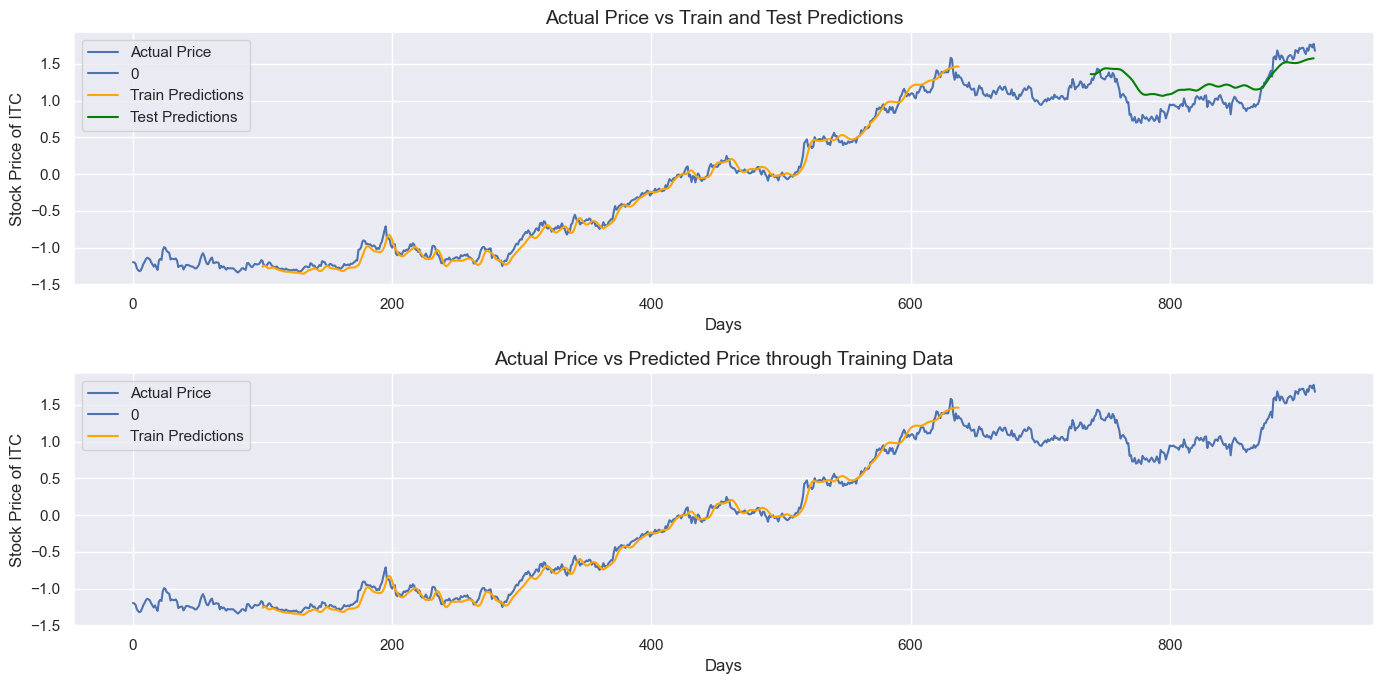

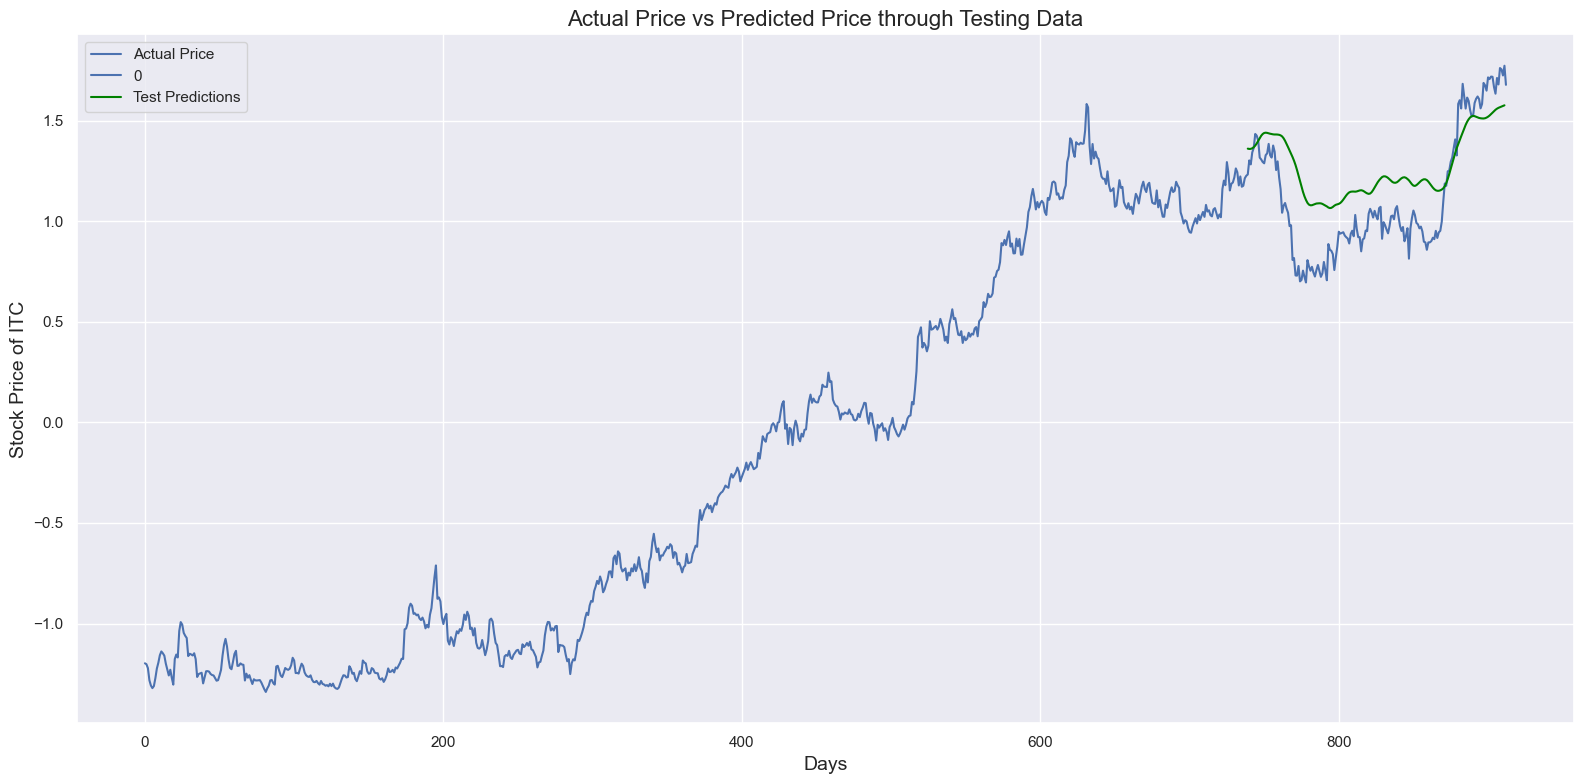

In [113]:
# Plotting the baseline and predictions
plt.figure(figsize=(14, 7))

# shift train predictions for plotting
look_back = 100
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict

# First Plot - Baseline and Predictions (Train and Test)
plt.subplot(2, 1, 1)
sns.lineplot(data=scaler.inverse_transform(df), label='Actual Price', color='blue')
sns.lineplot(data=trainPredictPlot.flatten(), label='Train Predictions', color='orange')
sns.lineplot(data=testPredictPlot.flatten(), label='Test Predictions', color='green')
plt.title('Actual Price vs Train and Test Predictions', fontsize=14)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Stock Price of ITC', fontsize=12)
plt.legend()

# Second Plot - Actual Price vs Predicted Price through Training Data
plt.subplot(2, 1, 2)
sns.lineplot(data=scaler.inverse_transform(df), label='Actual Price', color='blue')
sns.lineplot(data=trainPredictPlot.flatten(), label='Train Predictions', color='orange')
plt.title('Actual Price vs Predicted Price through Training Data', fontsize=14)
plt.xlabel('Days', fontsize=12)
plt.ylabel('Stock Price of ITC', fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

# Third Plot - Actual Price vs Predicted Price through Testing Data (Bigger Plot)
plt.figure(figsize=(16, 8))  # Increased figure size for the third plot
sns.lineplot(data=scaler.inverse_transform(df), label='Actual Price', color='blue')
sns.lineplot(data=testPredictPlot.flatten(), label='Test Predictions', color='green')
plt.title('Actual Price vs Predicted Price through Testing Data', fontsize=16)
plt.xlabel('Days', fontsize=14)
plt.ylabel('Stock Price of ITC', fontsize=14)
plt.legend()

plt.tight_layout()
plt.show()
